In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Select a basket of stocks to work with. They can pick their own.
# selected = ['CNP', 'F', 'WMT',  'GE', 'TSLA']
new_file = pd.read_csv(filepath_or_buffer='WIKI-PRICES.csv',sep=',',usecols=['date','ticker','open'])
# new_file['ZUMZ'] = new_file['ZUMZ'].fillna(0)
clean = new_file.set_index('date')

new_file = clean.pivot(columns='ticker')

# new_file.pivot(columns='ticker')
new_file

open              
ticker        ZQK    ZTS   ZUMZ
date                           
1994-01-04  14.88    NaN    NaN
1994-01-05  15.13    NaN    NaN
1994-01-06  15.75    NaN    NaN
1994-01-07  14.88    NaN    NaN
1994-01-10  14.62    NaN    NaN
...           ...    ...    ...
2018-03-21    NaN  84.87  23.80
2018-03-22    NaN  83.35  23.90
2018-03-23    NaN  82.16  23.55
2018-03-26    NaN  81.88  23.75
2018-03-27    NaN  84.08  24.65

[6100 rows x 3 columns]

In [54]:
returns_daily = new_file.pct_change()
returns_annual = returns_daily.mean() * 250 
returns_annual

      ticker
open  ZQK       0.064938
      ZTS       0.216554
      ZUMZ      0.199561
dtype: float64

In [56]:
# Get the daily covariance of returns of the stock.
# This is effectively, how much does one stock deviate from the mean.
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250
cov_annual

open                    
ticker            ZQK       ZTS      ZUMZ
     ticker                              
open ZQK     0.396973  0.001583  0.114217
     ZTS     0.001583  0.054112  0.010931
     ZUMZ    0.114217  0.010931  0.363773

In [67]:
# Now calculate the efficient frontier - over 50,000 permutations of the stocks
port_returns = []
port_volatility = []
stock_weights = []
selected = ['ZQK','ZTS','ZUMZ']
num_assets = len(selected)
num_portfolios = 50000
# Set a random seed, for reprodicibility
np.random.seed(200)

In [60]:
for p in range(num_portfolios):
    
    # Calculate a random weight, and make it a percentage of 
    # all the weights calculated for this basket.
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate the returns for this weighting of stocks, 
    # using the annual returns
    returns = np.dot(weights, returns_annual)
    
    # Calculate the volatility for this weighting of stocks, 
    # using the annual coveriance values
    # Effictively std. deviation
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    # Store the values for this portfolio
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [61]:
# Add a dictionary for Returns and Risk values of each portfolio
portfolio = { 'Returns': port_returns, 'Volatility': port_volatility }
print(portfolio)

{'Returns': [0.14593521186323746, 0.19279119347543183, 0.18596180209004015, 0.1848277657589774, 0.19379943548405687, 0.1670852248463306, 0.14428552423140845, 0.10173212821015723, 0.19469990086213537, 0.1642987674985628, 0.14814911376622647, 0.18027243464824871, 0.15373531877292815, 0.09039474859201348, 0.15428275624725998, 0.17648356490607095, 0.15349203144198992, 0.11149308533688233, 0.1365133933768313, 0.15165479771962917, 0.1798890610686465, 0.16370064413704438, 0.11502244166479479, 0.16558253239762527, 0.15309157801146828, 0.18744719968806733, 0.13859762326221206, 0.1566131077323149, 0.11305512997396361, 0.17427754249996144, 0.19920810995585386, 0.15849177213358473, 0.1737909144784584, 0.1533627258311288, 0.16782622765311114, 0.1352605376056069, 0.1398682668790303, 0.1440961425776301, 0.1399252029845599, 0.15005668148126508, 0.19111970750206342, 0.16324900576453139, 0.1830668428687912, 0.13970393679064616, 0.1916765690554451, 0.14528173316002652, 0.12696131413575068, 0.198676814379

In [63]:
# Extend the dictionary, to accomdate each ticker and weight in the portfolio
for counter, symbol in enumerate(selected):
    portfolio[symbol + ' Weight'] = [Weight[counter] for Weight in stock_weights]

In [64]:
# Finally! Make a DataFrame...
df = pd.DataFrame(portfolio)
                                     
# What's our data look like?
df.head()

,Returns,Volatility,ZQK Weight,ZTS Weight,ZUMZ Weight
0,0.145935,0.321246,0.462913,0.511562,0.025525
1,0.192791,0.342641,0.101450,0.405323,0.493227
2,0.185962,0.301376,0.159702,0.464909,0.375389
3,0.184828,0.282517,0.173255,0.505544,0.321201
4,0.193799,0.344243,0.094100,0.406421,0.499480


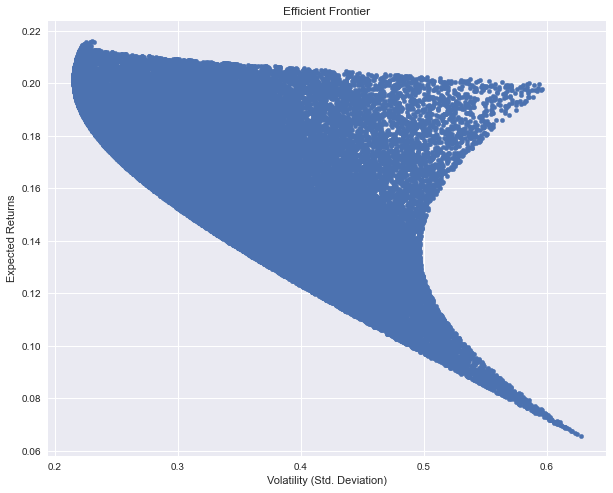

In [65]:
# Visualize the frontier!
# Use a scatter plot, and use seaborn colour styling...
plt.style.use('seaborn')
df.plot.scatter(x='Volatility',y='Returns',figsize=(10,8),grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()